https://github.com/zillur01/logistic-regression-gradient-descent/blob/main/logistic-regression-gradient-descent.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [71]:
pd.set_option('display.width', 1000)
# pd.option_context('display.max_colwidth', -1)

In [72]:
df = pd.read_csv("../datasets/Raisin_Dataset.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [73]:
#2 classes

df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [74]:
dfs = [x for _,x in df.groupby('Class')]
df0=dfs[1].reset_index(drop=True)
df1=dfs[0].drop(columns=['Class']).reset_index(drop=True)

In [75]:
df0.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [76]:
df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477


In [77]:
df0['Class']=0
df1['Class']=1

In [78]:
df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354,1
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006,1
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807,1
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979,1
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477,1


In [79]:
train_df0= df0.iloc[0:int(len(df0)*.8)]
train_df1=df1.iloc[0:int(len(df1)*.8)]

In [80]:
test_df0=df0.iloc[int(len(df0)*.8):]
test_df1=df1.iloc[int(len(df1)*.8):]

In [81]:
train_df0.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [82]:
train_df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354,1
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006,1
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807,1
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979,1
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477,1


In [83]:
X_train_data = pd.concat([
    train_df0.drop(['Class'], axis=1),
    train_df1.drop(['Class'], axis=1)
]).reset_index(drop=True)

X_train_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [84]:
X_train_data.shape

(720, 7)

In [ ]:
y_train = pd.concat([
    train_df0['Class'],
    train_df1['Class']
]).to_numpy()

y_train[:5]

In [86]:
X_test_data = pd.concat([
    test_df0.drop(['Class'], axis=1),
    test_df1.drop(['Class'], axis=1)
]).reset_index(drop=True)
y_test=pd.concat([
    test_df0['Class'],
    test_df1['Class']
]).to_numpy()

In [87]:
y_test[:4]

array([0, 0, 0, 0])

#It should be noted here that we are not standardizing our X for now. This way let us see how the loss function behaves

In [88]:
X_train_standard = X_train_data.copy()
X_train_standard= X_train_standard.to_numpy()

In [89]:
#bias term
X_train = np.hstack([
    np.ones((X_train_standard.shape[0], 1)),
    X_train_standard
])
X_train.shape

(720, 8)

In [90]:
X_test_standard = X_test_data.copy()

In [91]:
X_test_standard= X_test_standard.to_numpy()
X_test_standard.shape

(180, 7)

In [92]:
#Add bias term
X_test = np.hstack([
    np.ones((X_test_standard.shape[0],1)),
    X_test_standard
])
X_test.shape


(180, 8)

In [93]:
X_test[:5]

array([[1.00000000e+00, 4.88090000e+04, 3.32264893e+02, 1.90351365e+02,
        8.19631990e-01, 5.18470000e+04, 6.61341680e-01, 9.28016000e+02],
       [1.00000000e+00, 4.90390000e+04, 2.85402087e+02, 2.20819901e+02,
        6.33533709e-01, 5.08790000e+04, 7.14770872e-01, 8.41666000e+02],
       [1.00000000e+00, 6.46690000e+04, 3.64582804e+02, 2.28800767e+02,
        7.78561165e-01, 6.75240000e+04, 6.55845605e-01, 9.95692000e+02],
       [1.00000000e+00, 1.03377000e+05, 4.60670431e+02, 2.87993173e+02,
        7.80495845e-01, 1.05569000e+05, 7.26967785e-01, 1.23023300e+03],
       [1.00000000e+00, 7.39720000e+04, 3.59272692e+02, 2.63333390e+02,
        6.80269105e-01, 7.53530000e+04, 7.54739312e-01, 1.01774900e+03]])

#Sigmoid function 
sigmoid(x) = 1/(1 + exp(-x))

In [94]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x)) if x >0 else (np.exp(x)/(1+np.exp(x)))

#cost function

cost = -y * log(y_hat) - (1-y) * log(1-y_hat)

In [95]:
def cost(y_actual, y_hat):
    epsilon = 1e-15
    #Avoid log(0) situation
    y_hat_clipped = np.clip(y_hat,epsilon,1-epsilon)
    # loss = - y_actual * np.log(y_hat) - (1-y_actual)* np.log(1-y_hat)
    loss = - y_actual * np.log(y_hat_clipped) - (1-y_actual)* np.log(1-y_hat_clipped)
    return loss

#Gradient

gradient(w) = (y_hat - y) . X

In [96]:
def compute_gradient(X, y, y_proba):
    '''
    X: Input features Array of N x D shape
    y: ground truth output of N Shape
    y_proba: probability of N shape
    :param X: 
    :param y: 
    :param y_prob: 
    :return: 
    '''
    assert y.ndim == 1
    # print(f"X.shape: {X.shape}, {y=}, {y_proba=}")
    grad=np.dot((y_proba - y), X)
    # print(f"{grad=}")
    return grad

Probability Prediction

y_hat = sigmoid(w . x)

In [97]:
def probability(w,X):
    y_proba = np.array([])
    
    for i in range(len(X)):
        proba = sigmoid(np.dot(w,X[i]))
        y_proba = np.append(y_proba,proba)
    return y_proba

#Label Prediction

probability = sigmoid (w . x)

if probability > .5 => class 1 else class 0

In [98]:
def label_prediction(y_proba):
    y_pred = np.array([])
    
    for i in range(len(y_proba)):
        pred=0
        if y_proba[i] > 0.5:
            pred = 1
        y_pred=np.append(y_pred,pred)
    return y_pred

w = w - lr * gradient(w)

In [99]:
#Batch Gradient Descent
def fit(X, y, epochs=10, l_rate=.01):
    N = X.shape[0]
    w=np.ones((1,X_train.shape[1]))
    cost_list=[]
    
    for k in range(epochs):
        y_proba = probability(w,X)
        w= w - l_rate * compute_gradient(X, y, y_proba) #update weights
        
        #Cal the vectorized total cost(Loss)
        losses = cost(y,y_proba)
        #Ave cost
        total_cost=np.mean(losses)
        cost_list.append(total_cost)
    return w, cost_list
        

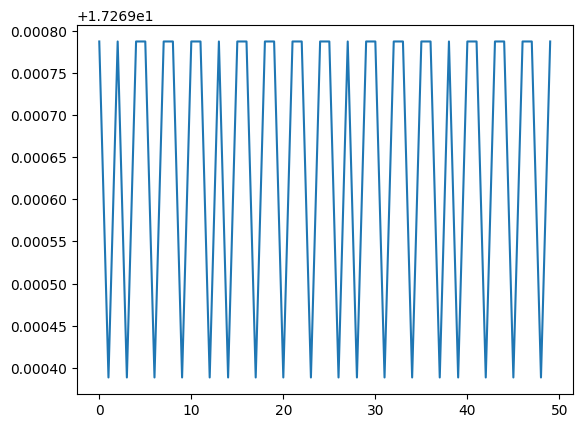

In [100]:
epochs = 50
l_rate=.0001

w_offline, cost_list_offline = fit(X_train, y_train, epochs=epochs, l_rate=l_rate)
# print(f"{w_offline=}, {cost_list_offline=}")
plt.plot(cost_list_offline)
plt.show();

As seen from above, the cost function is fluctuating,

solution : 

1. Use Mini-Batch Gradient
2.  standardize (remember we did not standardize X)


In [101]:
def create_mini_batches(X, y, batch_size):
    """
    Creates mini-batches for Mini-Batch Gradient Descent.
    
    Args:
        X (np.ndarray): The feature matrix.
        y (np.ndarray): The target vector (should be column vector or convertible).
        batch_size (int): The desired size of each batch.
        
    Returns:
        list: A list of tuples, where each tuple contains (X_mini, Y_mini).
    """
    mini_batches = []

    # Ensure y is a column vector for proper hstacking if it's 1D
    if y.ndim == 1:
        y_stacked = y.reshape(-1, 1)
    else:
        y_stacked = y

    # 1. Combine Data and Shuffle
    data = np.hstack((X, y_stacked))
    np.random.shuffle(data)

    N = data.shape[0]

    # 2. Slice the Data using iteration
    # The range function automatically handles the start, stop, and step (batch_size)
    for i in range(0, N, batch_size):
        # Slice the combined data for the current batch
        mini_batch = data[i : i + batch_size, :]

        # 3. Split the mini-batch back into features (X) and target (Y)
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) # Ensure Y is a column vector

        mini_batches.append((X_mini, Y_mini))

    return mini_batches

In [102]:
def fit_mini(X, y, batch_size = 10, epochs=10, learning_rate=0.01):
    N,d = X.shape
    w = np.ones((1,d))
    cost_list = []
    for k in range(epochs):
        mini_batches = create_mini_batches(X, y.reshape(len(y),1), batch_size)
        for X_mini, y_mini in mini_batches:
            y_proba = probability(w, X_mini)
            w -=learning_rate* compute_gradient(X_mini, np.squeeze(y_mini), y_proba)
            total_cost = np.mean(cost(y_mini, y_proba))
            cost_list.append(total_cost)
            
    return w, cost_list

## Training

Weights: [[-1.98700000e+00 -1.10155000e+02 -4.38224505e+02 -4.96676624e+02
  -8.70175002e-01  8.30128000e+02 -1.18978353e+00 -1.52798823e+03]]


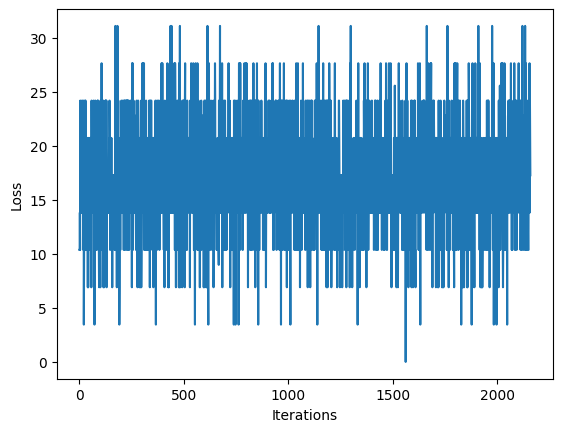

In [103]:
epochs = 30
learning_rate = 0.001
w_mini, cost_list_mini = fit_mini(X_train, y_train, epochs = epochs, learning_rate = learning_rate)
print(f"Weights: {w_mini}")
plt.plot(cost_list_mini)
plt.xlabel("Iterations")
plt.ylabel("Loss");

mini-batches cause noise in gradient updates. That’s normal, but you can smooth it by plotting the average loss per epoch instead of per mini-batch



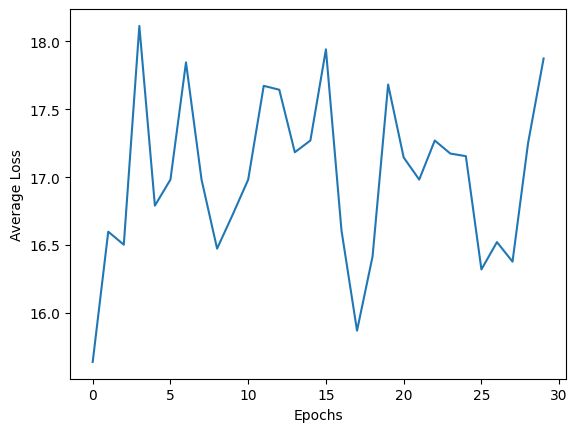

In [104]:
avg_costs = [np.mean(cost_list_mini[i:i+len(X_train)//10]) for i in range(0, len(cost_list_mini), len(X_train)//10)]
plt.plot(avg_costs)
plt.xlabel("Epochs")
plt.ylabel("Average Loss");


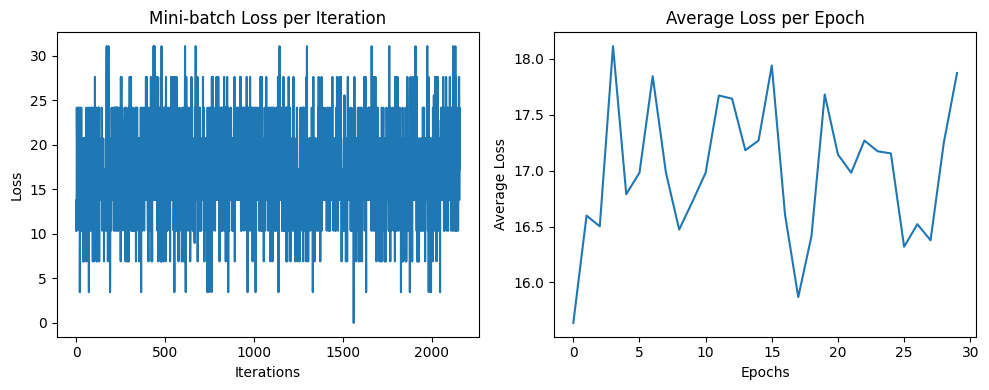

In [105]:
#Above Plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(cost_list_mini)
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("Mini-batch Loss per Iteration")

ax2.plot(avg_costs)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss")
ax2.set_title("Average Loss per Epoch")

plt.tight_layout()
plt.show()


Now the plot still shows the fluctuation but it has better compared to Batch gradient. To see if the loss can reduce without fluctuations, let us standardize X and see if there are any improvements 

In [106]:
X_train_standard = X_train_data.copy()

The entire dataset needs to be standardized. Only train set mean and std_dev are used to standardize the dataset to avoid potential bias. Each feature/attribute (Xi) is subtracted by its mean mu and divided by its standard deviation sigma

mu = 1/N * Xi 

Xi = (Xi - mu)/sigma

In [107]:
mean_train = X_train_data.mean()
std_train = X_train_data.std()

In [108]:
mean_train

Area               88043.401389
MajorAxisLength      432.215772
MinorAxisLength      254.705362
Eccentricity           0.780984
ConvexArea         91495.638889
Extent                 0.698941
Perimeter           1169.716692
dtype: float64

In [109]:
std_train

Area               38921.340363
MajorAxisLength      117.019632
MinorAxisLength       49.308385
Eccentricity           0.093355
ConvexArea         40763.058741
Extent                 0.054117
Perimeter            274.748746
dtype: float64

In [110]:
X_train_standard = (X_train_data - mean_train)/ std_train
X_train_standard.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.013345,0.085714,-0.028681,0.415126,-0.023297,1.103335,0.052132
1,-0.330857,-0.218127,-0.236733,0.223030,-0.311719,-0.273694,-0.174453
2,0.072264,0.085894,0.235720,0.186058,0.054494,-1.133249,0.141432
3,-1.082065,-1.244878,-0.931795,-1.028276,-1.083325,0.012163,-1.184918
4,-0.221868,-0.683860,0.732577,-2.324163,-0.246121,1.733843,-0.351105


In [111]:
X_train_standard = X_train_standard.to_numpy()
X_train_standard.shape

(720, 7)

In [112]:
X_train_standard[:5]

array([[-0.0133449 ,  0.08571416, -0.02868087,  0.41512632, -0.02329656,
         1.103335  ,  0.05213239],
       [-0.33085709, -0.21812652, -0.23673308,  0.22303044, -0.31171947,
        -0.27369394, -0.17445281],
       [ 0.07226366,  0.08589393,  0.23571966,  0.18605753,  0.05449447,
        -1.13324915,  0.14143216],
       [-1.08206452, -1.24487841, -0.93179527, -1.02827601, -1.08332496,
         0.01216348, -1.18491784],
       [-0.22186804, -0.68385963,  0.73257664, -2.32416346, -0.24612086,
         1.73384286, -0.35110512]])

In [113]:
#add bias term
X_train = np.hstack([np.ones((X_train_standard.shape[0],1)),X_train_standard])
X_train.shape

(720, 8)

In [114]:
X_train[:5]

array([[ 1.        , -0.0133449 ,  0.08571416, -0.02868087,  0.41512632,
        -0.02329656,  1.103335  ,  0.05213239],
       [ 1.        , -0.33085709, -0.21812652, -0.23673308,  0.22303044,
        -0.31171947, -0.27369394, -0.17445281],
       [ 1.        ,  0.07226366,  0.08589393,  0.23571966,  0.18605753,
         0.05449447, -1.13324915,  0.14143216],
       [ 1.        , -1.08206452, -1.24487841, -0.93179527, -1.02827601,
        -1.08332496,  0.01216348, -1.18491784],
       [ 1.        , -0.22186804, -0.68385963,  0.73257664, -2.32416346,
        -0.24612086,  1.73384286, -0.35110512]])

In [115]:
X_test_standard=(X_test_data- mean_train)/std_train
X_test_standard.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-1.008043,-0.854138,-1.305133,0.413987,-0.972661,-0.694778,-0.879715
1,-1.002134,-1.254607,-0.687215,-1.579456,-0.996408,0.292508,-1.194003
2,-0.600555,-0.577963,-0.525359,-0.025955,-0.588073,-0.796336,-0.633396
3,0.393964,0.243161,0.675094,-0.005231,0.345248,0.517888,0.220261
4,-0.361534,-0.623341,0.174981,-1.078837,-0.396011,1.031061,-0.553115


In [116]:
X_test_standard = X_test_standard.to_numpy()
X_test_standard.shape

(180, 7)

In [117]:
X_test = np.hstack([np.ones((X_test.shape[0],1)),X_test_standard])
X_test.shape

(180, 8)

In [118]:
X_test[:5]

array([[ 1.        , -1.00804343, -0.85413769, -1.30513294,  0.41398657,
        -0.97266103, -0.69477766, -0.87971536],
       [ 1.        , -1.00213407, -1.2546073 , -0.68721498, -1.57945564,
        -0.99640803,  0.29250827, -1.19400251],
       [ 1.        , -0.60055489, -0.57796258, -0.52535882, -0.02595471,
        -0.58807262, -0.79633632, -0.63339576],
       [ 1.        ,  0.39396379,  0.24316142,  0.67509432, -0.00523086,
         0.34524792,  0.51788769,  0.22026054],
       [ 1.        , -0.36153435, -0.62334053,  0.17498095, -1.07883677,
        -0.39601147,  1.03106104, -0.55311514]])

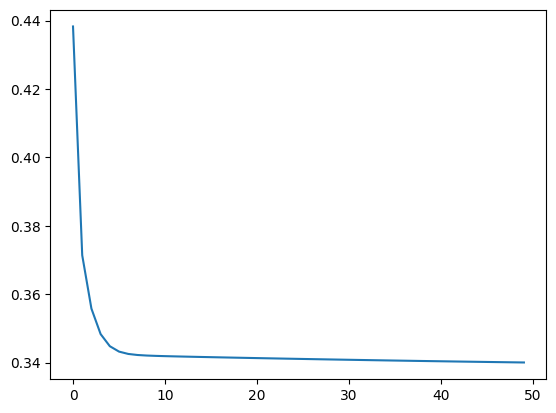

In [121]:
epochs = 50
l_rate=.01

w_offline, cost_list_offline = fit(X_train, y_train, epochs=epochs, l_rate=l_rate)
plt.plot(cost_list_offline)
plt.show();

In [122]:
### Learning Rate comparison side by side

In [124]:
epochs = 50
l_rate_1=.01
l_rate_2=.001

w_offline_1, cost_list_offline_1 = fit(X_train, y_train, epochs=epochs, l_rate=l_rate_1)
w_offline_2, cost_list_offline_2 = fit(X_train, y_train, epochs=epochs, l_rate=l_rate_2)


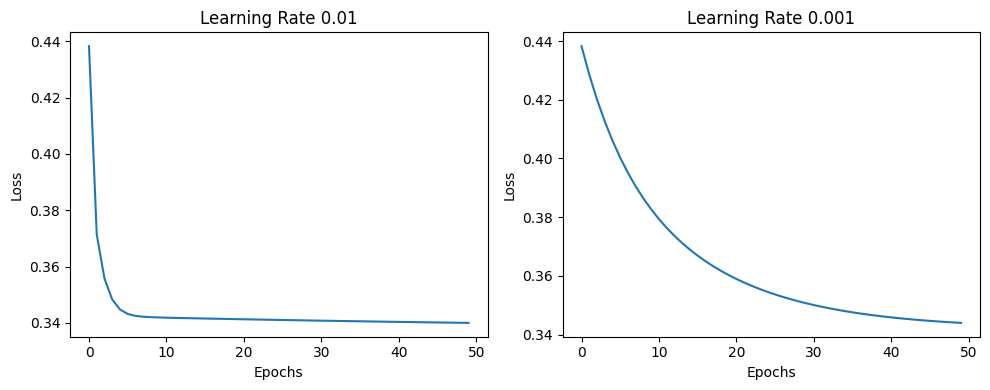

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(cost_list_offline_1)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Learning Rate {}".format(l_rate_1))

ax2.plot(cost_list_offline_2)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Learning Rate {}".format(l_rate_2))

plt.tight_layout()
plt.show()


## Summary

We saw that both standardization and usage of mini batch along with ave loss provides smoother descending loss function compared to Standard GD. In mini batch gd, we create batches of training data and use one batch at a time. After 1 forward pass using 1 batch, the weights are updated, that means , we update the weights more frequently than offline learning.